In [40]:
# Read table and load data

# data = np.matrix(np.genfromtxt("http://www.cs.iit.edu/~agam/cs584/data/regression/svar-set1.dat"))
# data = np.matrix(np.genfromtxt("http://www.cs.iit.edu/~agam/cs584/data/regression/svar-set2.dat"))
data = np.matrix(np.genfromtxt("http://www.cs.iit.edu/~agam/cs584/data/regression/svar-set3.dat"))
# data = np.matrix(np.genfromtxt("http://www.cs.iit.edu/~agam/cs584/data/regression/svar-set4.dat"))
# print data

In [41]:
# Print the shape of data
print data.shape

(200L, 2L)


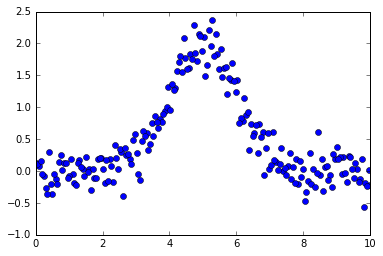

In [42]:
#Plot data using matplotlib

a= np.array(data[0:len(data),0])
b= np.array(data[0:len(data),1])
plt.plot(a,b, 'bo')

In [43]:
tr = 0
te = 0
def train_test_split(split_val): 
    
    #Eg Enter split_val as 0.2 to get test set with 20% size of dataset and train set with 80% size of dataset
    #Change values of split_val for 1.5
    
    tr = data[:(-(int)(len(data)*split_val))]
    te = data[(-(int)(len(data)*split_val)):]
    return tr, te

tr, te = train_test_split(0.2)
tr, te

(matrix([[  4.62311558e+00,   1.83808501e+00],
         [  8.79396985e+00,  -6.97110973e-02],
         [  8.99497487e+00,   3.74705947e-01],
         [  8.04020101e+00,  -4.64004482e-01],
         [  3.66834171e+00,   6.78234265e-01],
         [  2.31155779e+00,  -1.69622728e-01],
         [  3.86934673e+00,   9.42708744e-01],
         [  1.30653266e+00,   1.78621393e-01],
         [  2.51256281e-01,  -7.58550106e-02],
         [  9.34673367e+00,   2.39996055e-01],
         [  7.18592965e+00,   1.42372771e-01],
         [  5.52763819e+00,   1.91570864e+00],
         [  1.15577889e+00,  -1.86477749e-01],
         [  4.57286432e+00,   1.61041634e+00],
         [  6.43216080e+00,   7.35304811e-01],
         [  5.82914573e+00,   1.43213663e+00],
         [  2.56281407e+00,   2.91279491e-01],
         [  8.49246231e+00,  -5.94571888e-02],
         [  7.63819095e+00,  -1.23227051e-01],
         [  6.03015075e-01,  -1.23467455e-01],
         [  5.22613065e+00,   1.96178619e+00],
         [  5

In [44]:
#Fit data on training set (Using gradient descent)

#Get co-efficients

theta_0 =rand.uniform(0,1) #intercept
theta_1 =rand.uniform(0,1) #slope

#Put the learning rate
alpha = 0.00001

x = tr[:,0]
y = tr[:,1]
unit_mat = np.matrix(np.ones(160)).transpose()

print x.transpose().shape, y.shape

count = 0

#Apply gradient descent to get local minima
for i in range(2000):
    
    pt0 = theta_0
    pt1 = theta_1
    
    b = ((((theta_0 + (theta_1*(x.transpose()))) - y.transpose())))
    t0_prod = np.dot(b,unit_mat)
    temp_0 = theta_0 - (alpha * t0_prod)      
    
    a = ((((theta_0 + (theta_1*(x.transpose()))) - y.transpose())))
    t1_prod = np.dot(a,x)
    temp_1 = theta_1 - (alpha * t1_prod)
    
    count += 1
    
    if ((abs(theta_0 - temp_0) < 0.0000001) & (abs(theta_1 - temp_1) < 0.0000001)):
        break
        
    theta_0 = temp_0
    theta_1 = temp_1

print count
print theta_0, theta_1

(1L, 160L) (160L, 1L)
2000
[[ 0.41695565]] [[ 0.00671099]]


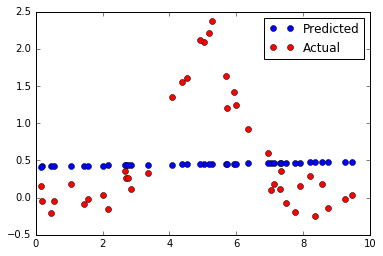

0.603897768251


In [45]:
#Predict output of the test set

x_te = te[:,0]
y_te = te[:,1]

pred = theta_0 + (theta_1*(x_te.transpose())) #predicted output

plt.plot(np.array(x_te),np.array(pred.transpose()), 'bo', label='Predicted')
plt.plot(np.array(x_te),np.array(y_te), 'ro', label='Actual')
plt.legend()
plt.show()

mse = np.mean(np.square(pred - y_te.transpose()))
print mse   #get mean square error for predicted output vs actual output

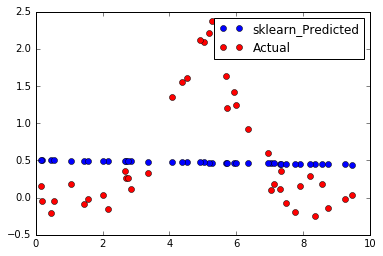

0.603060283306


In [46]:
# Using sklearn linear regression to fit and predict data

from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(x.reshape(-1,1), y.reshape(-1,1))   #fit the training data

sk_pred = regr.predict(x_te.reshape(-1,1))   #predict the test data

plt.plot(np.array(x_te),np.array(sk_pred), 'bo', label='sklearn_Predicted')
plt.plot(np.array(x_te),np.array(y_te), 'ro', label='Actual')
plt.legend()
plt.show()


sk_mse = np.mean(np.square(np.subtract(sk_pred.transpose(), y_te.transpose())))
print sk_mse  #get mean square error for sklearn predicted output vs actual output

In [47]:
#Quadratic
#--------------------------

#Fit data on training set (Using Normal Equations method)
#Get co-efficients

from numpy.linalg import inv
trr = np.column_stack((np.matrix(np.ones(160)).transpose(), x, np.square(x)))

p1 = inv(np.dot(trr.transpose(), trr))
p2 = np.dot(trr.transpose(), y)

theta = np.dot(p1, p2)
print theta

[[-0.57954544]
 [ 0.63763418]
 [-0.06352796]]


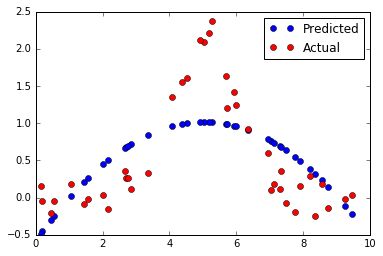

0.315433982885


In [48]:
#Predict output of the test set (Quadratic)

x_te = te[:,0]
y_te = te[:,1]

# pred = theta_0 + (theta_1*(x_te.transpose())) predicted output

pred = (theta[0,:] + (theta[1,:]*(x_te.transpose())) + (theta[2,:]*(np.square(x_te.transpose()))))

plt.plot(np.array(x_te),np.array(pred.transpose()), 'bo', label='Predicted')
plt.plot(np.array(x_te),np.array(y_te), 'ro', label='Actual')
plt.legend()
plt.show()

mse = np.mean(np.square(pred - y_te.transpose()))
print mse   #get mean square error for predicted output vs actual output (quadratic)

In [49]:
#Cubic
#--------------------------

#Fit data on training set (Using Normal Equations method)
#Get co-efficients

from numpy.linalg import inv
trr = np.column_stack((np.matrix(np.ones(160)).transpose(), x, np.square(x), np.power(x, 3)))

p1 = inv(np.dot(trr.transpose(), trr))
p2 = np.dot(trr.transpose(), y)

theta = np.dot(p1, p2)
print theta

[[ -6.12297396e-01]
 [  6.76622917e-01]
 [ -7.32364093e-02]
 [  6.42840170e-04]]


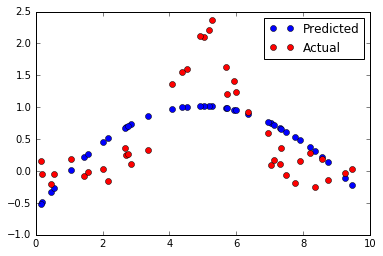

0.316480643865


In [50]:
#Predict output of the test set (Cubic)

x_te = te[:,0]
y_te = te[:,1]


pred = (theta[0,:] + (theta[1,:]*(x_te.transpose())) + (theta[2,:]*(np.square(x_te.transpose()))) + (theta[3,:]*(np.power(x_te.transpose(), 3))))

plt.plot(np.array(x_te),np.array(pred.transpose()), 'bo', label='Predicted')
plt.plot(np.array(x_te),np.array(y_te), 'ro', label='Actual')
plt.legend()
plt.show()

mse = np.mean(np.square(pred - y_te.transpose()))
print mse   #get mean square error for predicted output vs actual output (cubic)

In [51]:
#Quartic
#--------------------------

#Fit data on training set (Using Normal Equations method)
#Get co-efficients

from numpy.linalg import inv
trr = np.column_stack((np.matrix(np.ones(160)).transpose(), x, np.square(x), np.power(x, 3), np.power(x, 4)))

p1 = inv(np.dot(trr.transpose(), trr))
p2 = np.dot(trr.transpose(), y)

theta = np.dot(p1, p2)
print theta

[[ 0.38666923]
 [-1.3059726 ]
 [ 0.81497666]
 [-0.13686413]
 [ 0.00683748]]


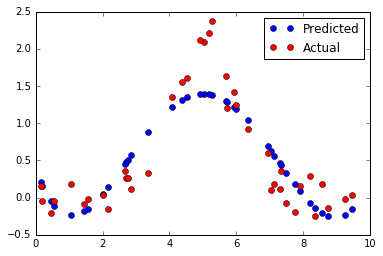

0.131544709095


In [52]:
#Predict output of the test set (Quartic)

x_te = te[:,0]
y_te = te[:,1]

# pred = theta_0 + (theta_1*(x_te.transpose())) predicted output

pred = (theta[0,:] + (theta[1,:]*(x_te.transpose())) + (theta[2,:]*(np.square(x_te.transpose()))) + (theta[3,:]*(np.power(x_te.transpose(), 3))) + (theta[4,:]*(np.power(x_te.transpose(), 4))))

plt.plot(np.array(x_te),np.array(pred.transpose()), 'bo', label='Predicted')
plt.plot(np.array(x_te),np.array(y_te), 'ro', label='Actual')
plt.legend()
plt.show()

mse = np.mean(np.square(pred - y_te.transpose()))
print mse   #get mean square error for predicted output vs actual output (quartic)

In [53]:
#Power of 5
#--------------------------

#Fit data on training set (Using Normal Equations method)
#Get co-efficients

from numpy.linalg import inv
trr = np.column_stack((np.matrix(np.ones(160)).transpose(), x, np.square(x), np.power(x, 3), np.power(x, 4), np.power(x, 5)))

p1 = inv(np.dot(trr.transpose(), trr))
p2 = np.dot(trr.transpose(), y)

theta = np.dot(p1, p2)
print theta

[[  4.66458298e-01]
 [ -1.54658727e+00]
 [  9.83932448e-01]
 [ -1.81971237e-01]
 [  1.19084265e-02]
 [ -2.02417175e-04]]


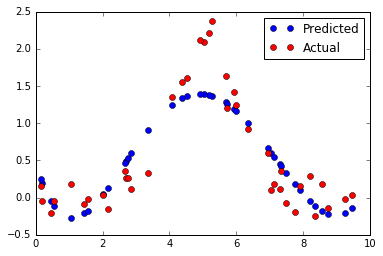

0.132660951114


In [54]:
#Predict output of the test set (Power of 5)

x_te = te[:,0]
y_te = te[:,1]

# pred = theta_0 + (theta_1*(x_te.transpose())) predicted output

pred = (theta[0,:] + (theta[1,:]*(x_te.transpose())) + (theta[2,:]*(np.square(x_te.transpose()))) + (theta[3,:]*(np.power(x_te.transpose(), 3))) + (theta[4,:]*(np.power(x_te.transpose(), 4))) + (theta[5,:]*(np.power(x_te.transpose(), 5))))

plt.plot(np.array(x_te),np.array(pred.transpose()), 'bo', label='Predicted')
plt.plot(np.array(x_te),np.array(y_te), 'ro', label='Actual')
plt.legend()
plt.show()

mse = np.mean(np.square(pred - y_te.transpose()))
print mse   #get mean square error for predicted output vs actual output (Power of 5)

In [55]:
#Power of 6
#--------------------------

#Fit data on training set (Using Normal Equations method)
#Get co-efficients

from numpy.linalg import inv
trr = np.column_stack((np.matrix(np.ones(160)).transpose(), x, np.square(x), np.power(x, 3), np.power(x, 4), np.power(x, 5), np.power(x, 6)))

p1 = inv(np.dot(trr.transpose(), trr))
p2 = np.dot(trr.transpose(), y)

theta = np.dot(p1, p2)
print theta

[[ -3.19018899e-01]
 [  1.93618234e+00]
 [ -2.57836203e+00]
 [  1.25781006e+00]
 [ -2.59215095e-01]
 [  2.36769600e-02]
 [ -7.95007297e-04]]


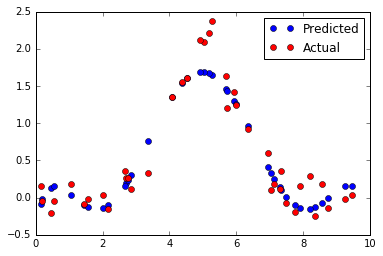

0.0606142033444


In [56]:
#Predict output of the test set (Power of 6)

x_te = te[:,0]
y_te = te[:,1]

# pred = theta_0 + (theta_1*(x_te.transpose())) predicted output

pred = (theta[0,:] + (theta[1,:]*(x_te.transpose())) + (theta[2,:]*(np.square(x_te.transpose()))) + (theta[3,:]*(np.power(x_te.transpose(), 3))) + (theta[4,:]*(np.power(x_te.transpose(), 4))) + (theta[5,:]*(np.power(x_te.transpose(), 5))) + (theta[6,:]*(np.power(x_te.transpose(), 6))))

plt.plot(np.array(x_te),np.array(pred.transpose()), 'bo', label='Predicted')
plt.plot(np.array(x_te),np.array(y_te), 'ro', label='Actual')
plt.legend()
plt.show()

mse = np.mean(np.square(pred - y_te.transpose()))
print mse   #get mean square error for predicted output vs actual output (Power of 6)

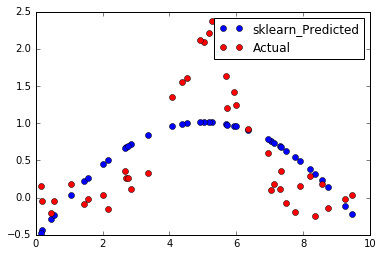

0.316145488671


In [57]:
# (For comparison) sklearn polynomial predictors for training the data and testing the output 

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

regr = make_pipeline(PolynomialFeatures(2), Ridge()) #Quadratic
# regr = make_pipeline(PolynomialFeatures(3), Ridge()) #Cubic
# regr = make_pipeline(PolynomialFeatures(4), Ridge()) #Quartic
# regr = make_pipeline(PolynomialFeatures(5), Ridge()) #Power of 5
# regr = make_pipeline(PolynomialFeatures(6), Ridge()) #Power of 6



regr.fit(x.reshape(-1,1), y.reshape(-1,1))   #fit the training data


# regr = linear_model.LinearRegression()
# regr.fit(x.reshape(-1,1), y.reshape(-1,1))   #fit the training data


sk_pred = regr.predict(x_te.reshape(-1,1))   #predict the test data

plt.plot(np.array(x_te),np.array(sk_pred), 'bo', label='sklearn_Predicted')
plt.plot(np.array(x_te),np.array(y_te), 'ro', label='Actual')
plt.legend()
plt.show()


sk_mse = np.mean(np.square(np.subtract(sk_pred.transpose(), y_te.transpose())))
print sk_mse  #get mean square error for sklearn predicted output vs actual output